In [100]:
import pandas as pd
import numpy as np

import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix,classification_report

### Downloading CIFAR10 Dataset and splitting into train and test

In [101]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

### EDA

In [102]:
X_train.shape

(50000, 32, 32, 3)

In [103]:
y_train.shape

(50000, 1)

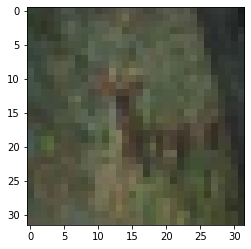

In [104]:
plt.figure()
plt.imshow(X_train[10])
plt.show()

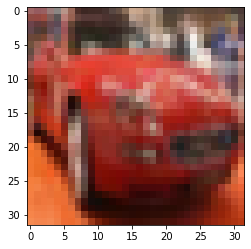

In [105]:
plt.figure()
plt.imshow(X_train[5])
plt.show()

In [106]:
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

In [107]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### Encoding

In [108]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [109]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### Creating a model

In [113]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',activation='relu',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)              

In [116]:
model.compile(loss='categorical_crossentropy',
              optimizer='Nadam',
              metrics=['accuracy'])

In [115]:
history = model.fit(X_train, y_train,
              batch_size=32,
              epochs=5,
              validation_data=(X_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 42s 26ms/step - loss: 1.6525 - accuracy: 0.4104 - val_loss: 1.1325 - val_accuracy: 0.6090
Epoch 2/5
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1033 - accuracy: 0.6175 - val_loss: 1.0423 - val_accuracy: 0.6327
Epoch 3/5
1563/1563 [==============================] - 42s 27ms/step - loss: 0.9659 - accuracy: 0.6687 - val_loss: 0.9298 - val_accuracy: 0.6768
Epoch 4/5
1563/1563 [==============================] - 45s 29ms/step - loss: 0.8875 - accuracy: 0.6917 - val_loss: 0.9009 - val_accuracy: 0.6905
Epoch 5/5
1563/1563 [==============================] - 43s 27ms/step - loss: 0.8331 - accuracy: 0.7087 - val_loss: 0.8499 - val_accuracy: 0.7062


In [117]:
y_pred = model.predict(X_test)

In [118]:
y_pred = np.argmax(y_pred, axis=1)

In [119]:
y_test = np.argmax(y_test, axis=1)

In [120]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.84      0.81      0.82      1000
           2       0.52      0.67      0.59      1000
           3       0.52      0.58      0.54      1000
           4       0.70      0.62      0.66      1000
           5       0.68      0.53      0.59      1000
           6       0.76      0.81      0.79      1000
           7       0.83      0.70      0.76      1000
           8       0.77      0.84      0.80      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



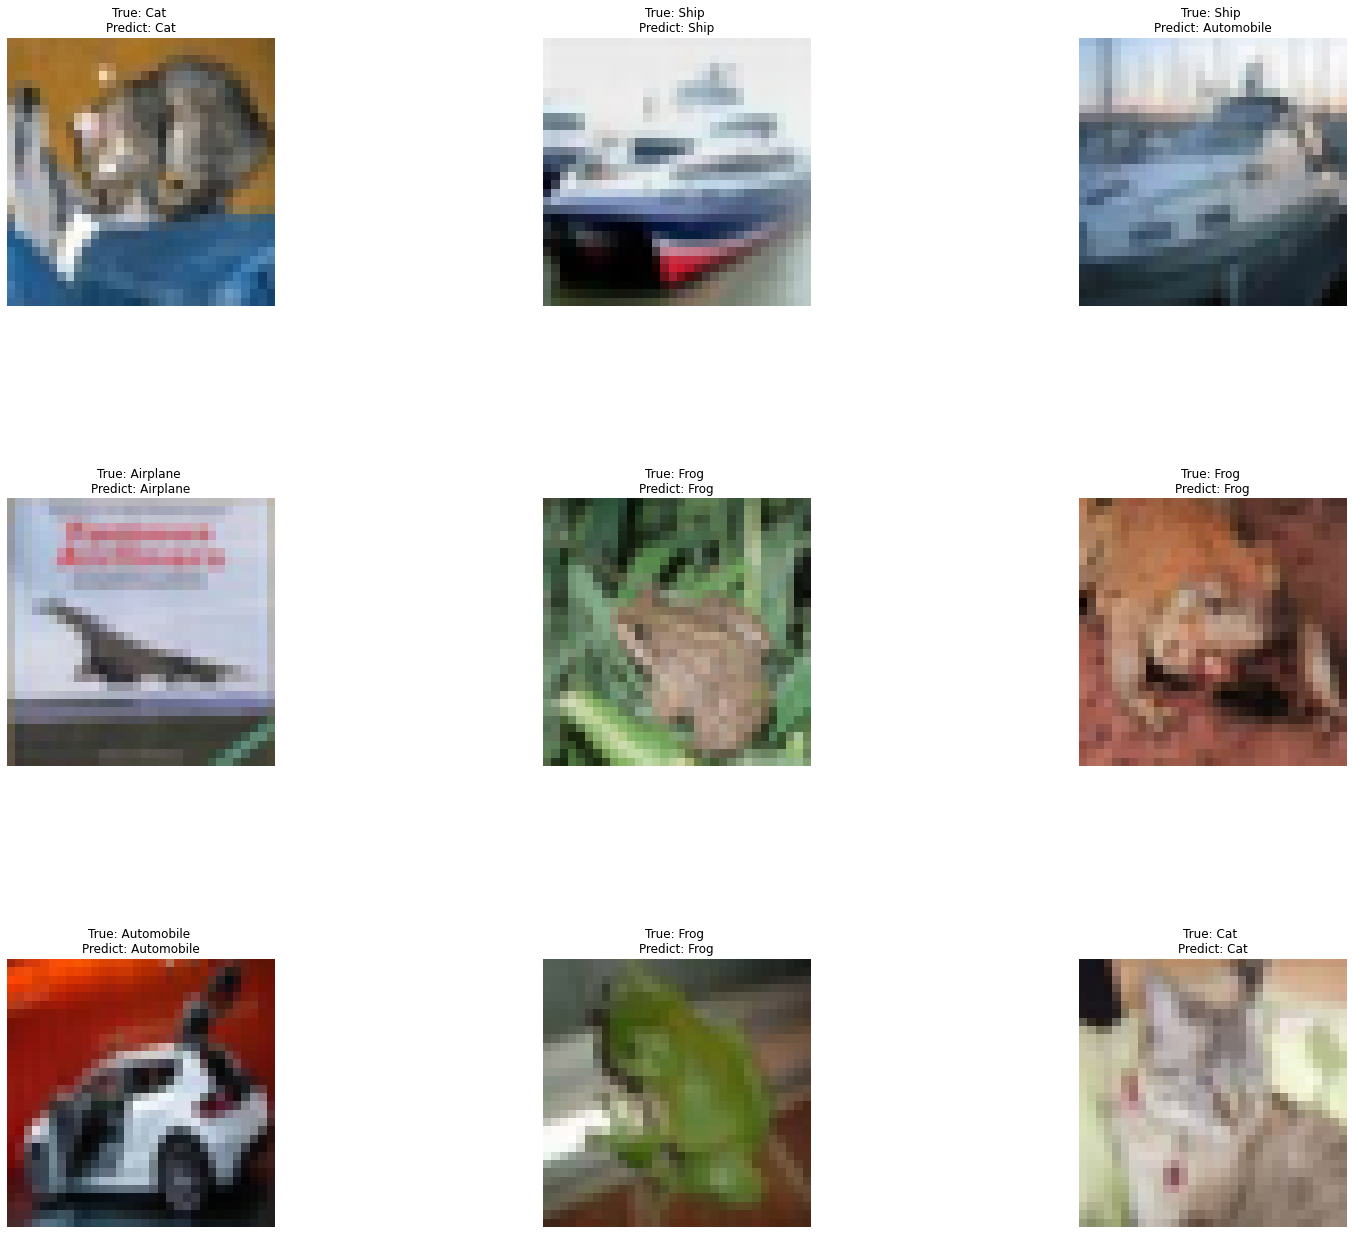

In [126]:
L = 3
W = 3
fig, axes = plt.subplots(L, W, figsize=(24,24))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(X_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[y_test[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

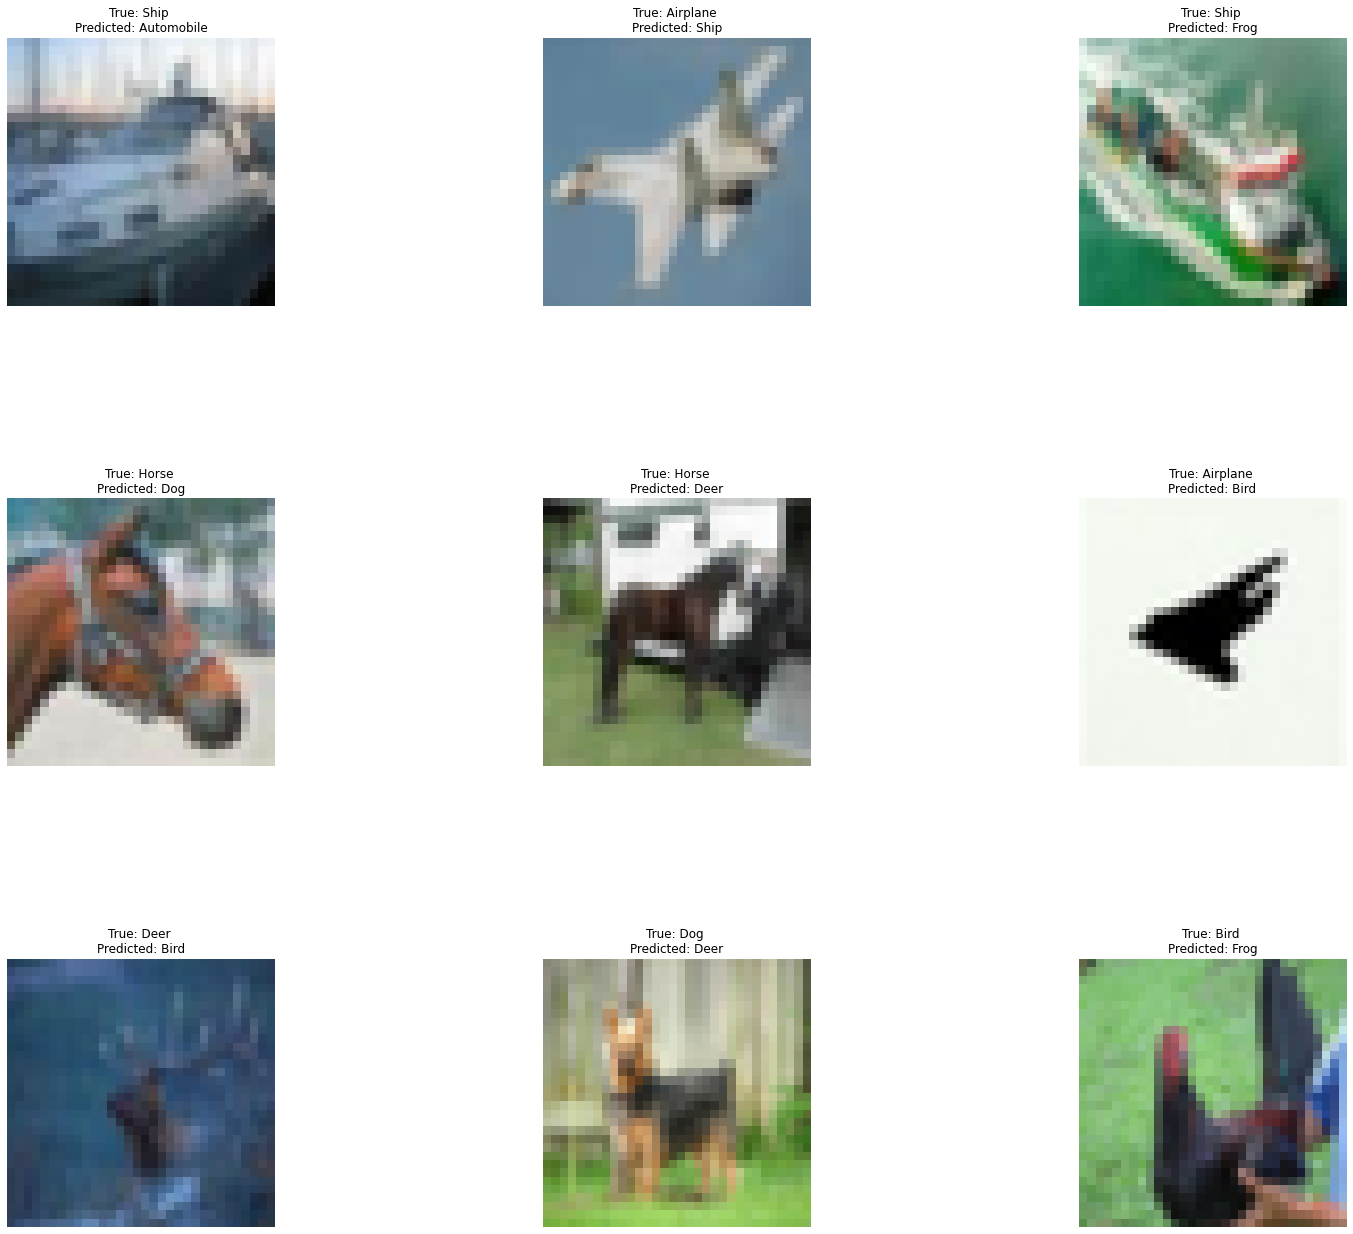

In [130]:
fig, axes = plt.subplots(L, W, figsize=(24,24))
axes = axes.ravel()

misclassified_idx = np.where(y_pred != y_test)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(X_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[y_test[misclassified_idx[i]]], 
                                                  labels[y_pred[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [182]:
y_test[misclassified_idx[33]]

1

In [183]:
labels[y_test[misclassified_idx[33]]]

'Automobile'